In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# Test Field 

Goal is to modify coupling strengths so that bursting in E and I population vanishes.

* Bursting of Exc pop is reduced if J_itoe is increased
* Bursting of Inh pop is reduced if J_itoi is increased


**Challenge:**

* Increased noise strengths must still lead to synchronization!


In [171]:
params = {
  "runtime": 600.0,

  "J_itoi": 17.0,
  "J_etoe": 0.4,
  "J_etoi": 0.8,
  "J_itoe": 15.0,
    
  "J_ppee": 0.8,
  "J_ppei": 1.2,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 10.0,
  "poisson_p": 0.84,
  "poisson_size": 800,
  "poisson_mean_input": 350,

   "const_delay": 0.2,
   "N_pop": 2
}

In [188]:
params_mid = dict(params)
params_mid["poisson_variance"] = 8.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 15312.5 - single neuron 19.140625
Poisson strength: 0.022857142857142857
Net 2 - rate for single neuron 16.078125
Initialization time: 0.49640393257141113s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.6 s
0.6 s (100%) simulated in 4s
==== Network Run Finished ====
runtime: 8.3


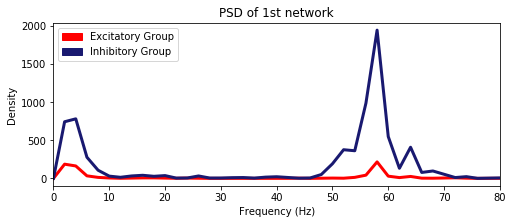

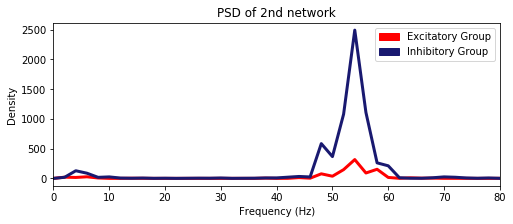

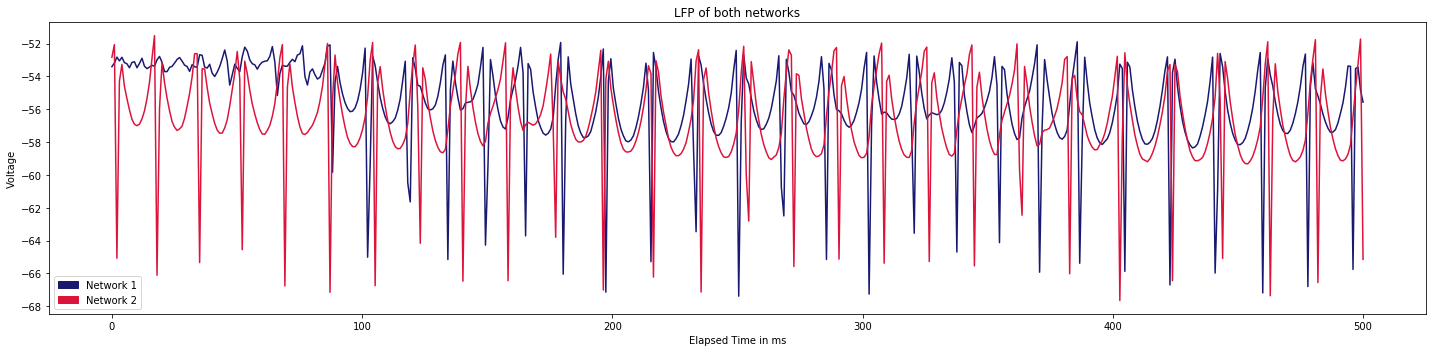

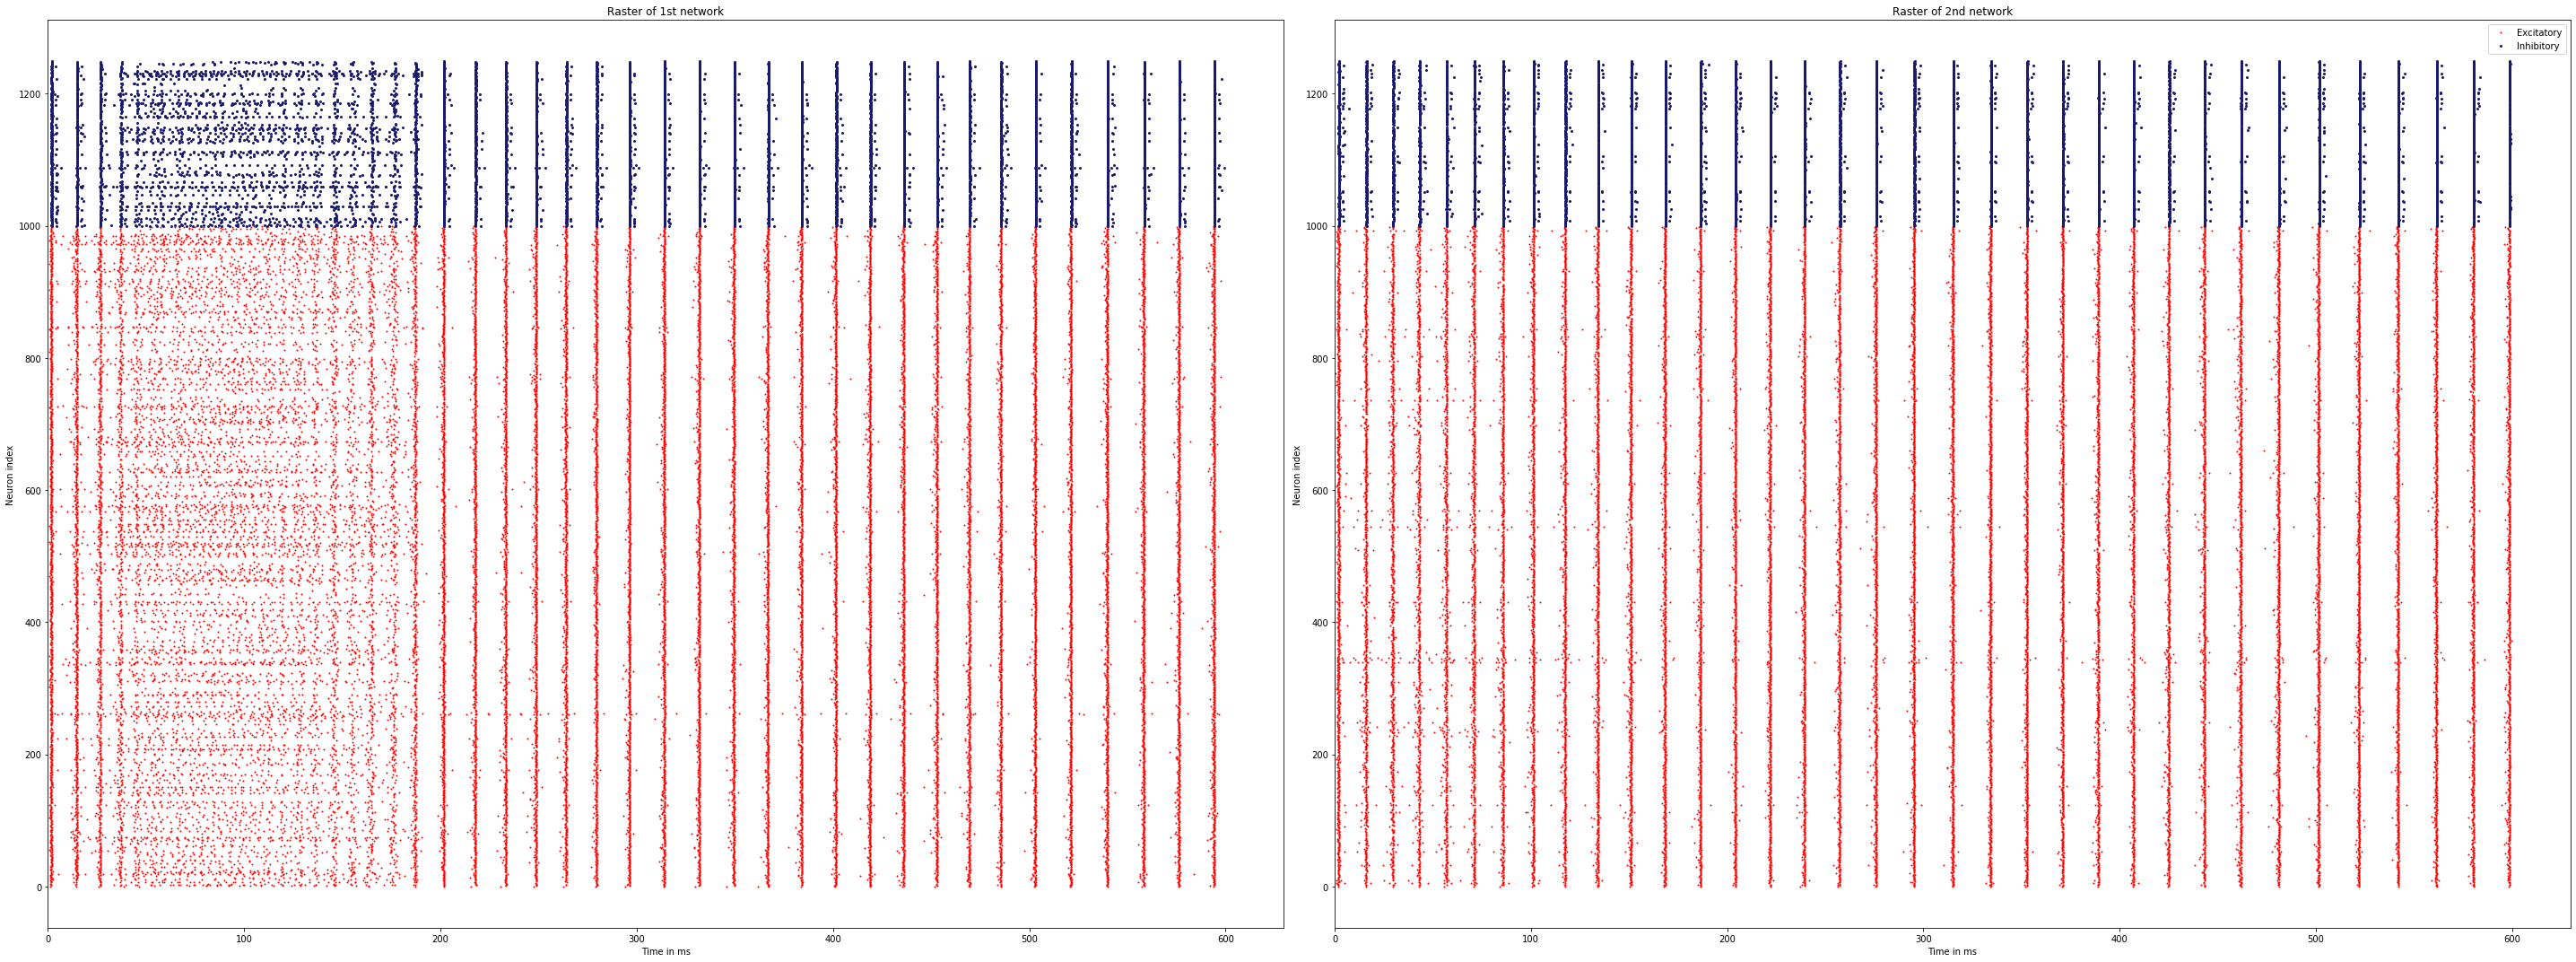

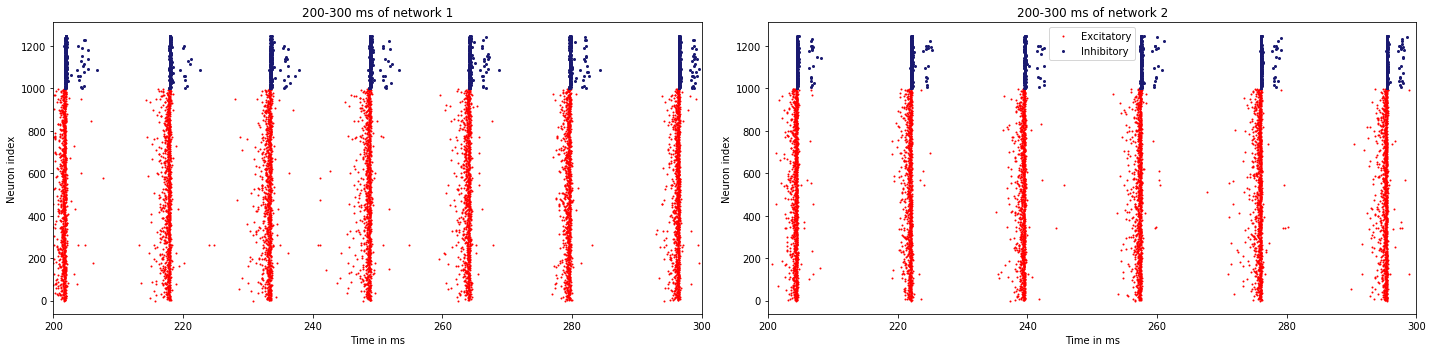

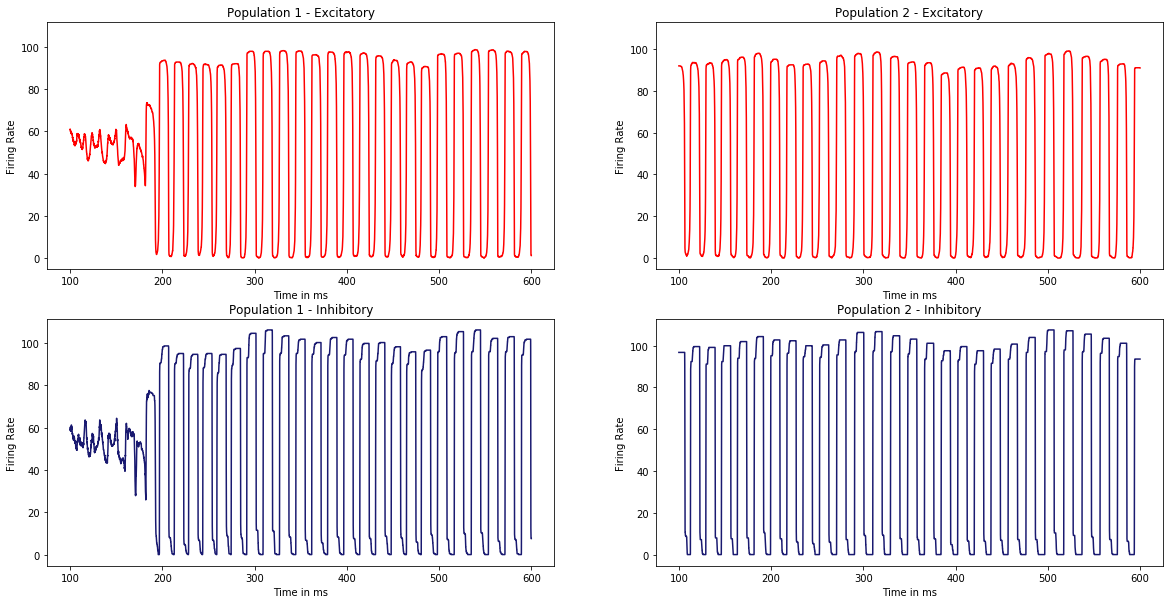

In [189]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

In [88]:
params_mid = dict(params)
params_mid["poisson_variance"] = 8.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 11250.0 - single neuron 14.0625
Poisson strength: 0.02666666666666667
Net 2 - rate for single neuron 11.25
Initialization time: 0.492384672164917s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 3s
==== Network Run Finished ====
runtime: 7.2


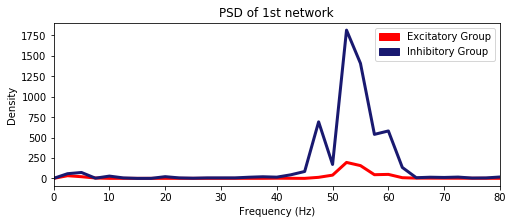

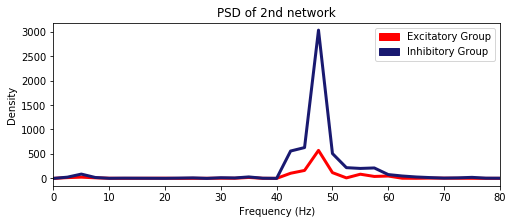

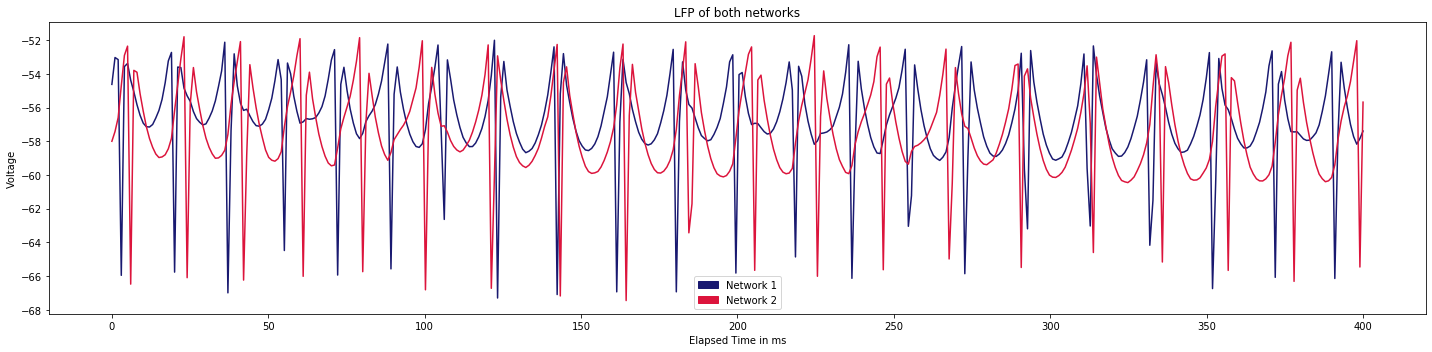

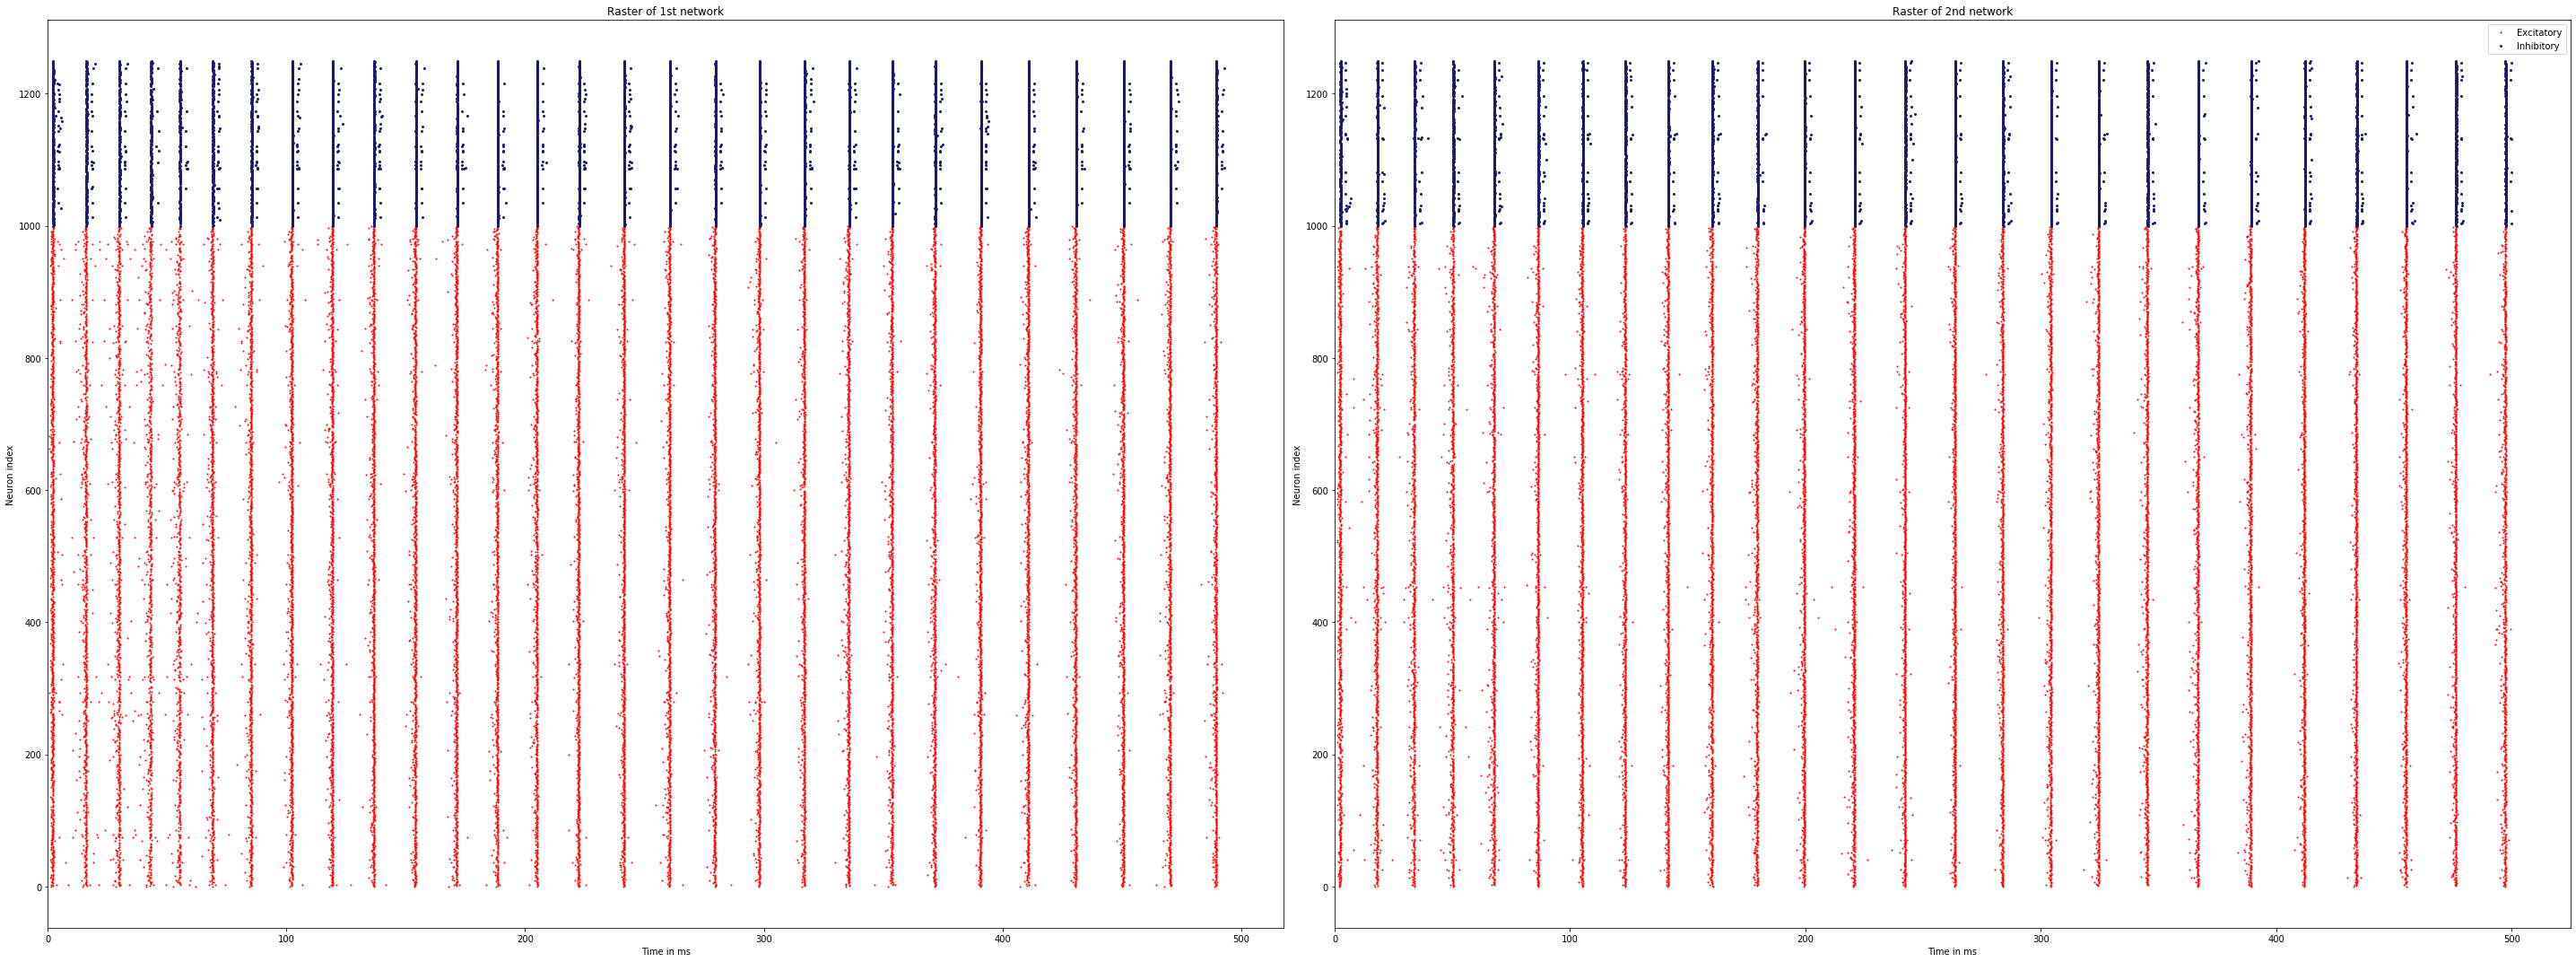

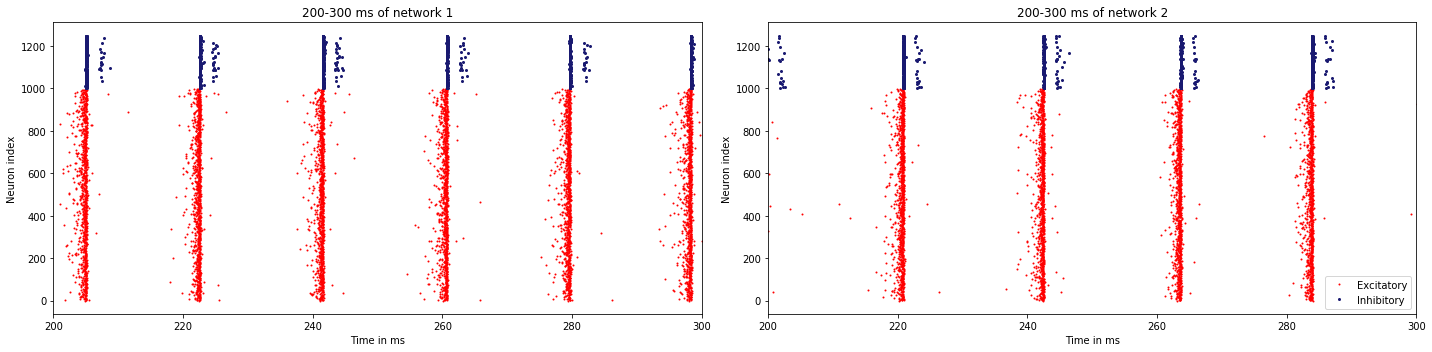

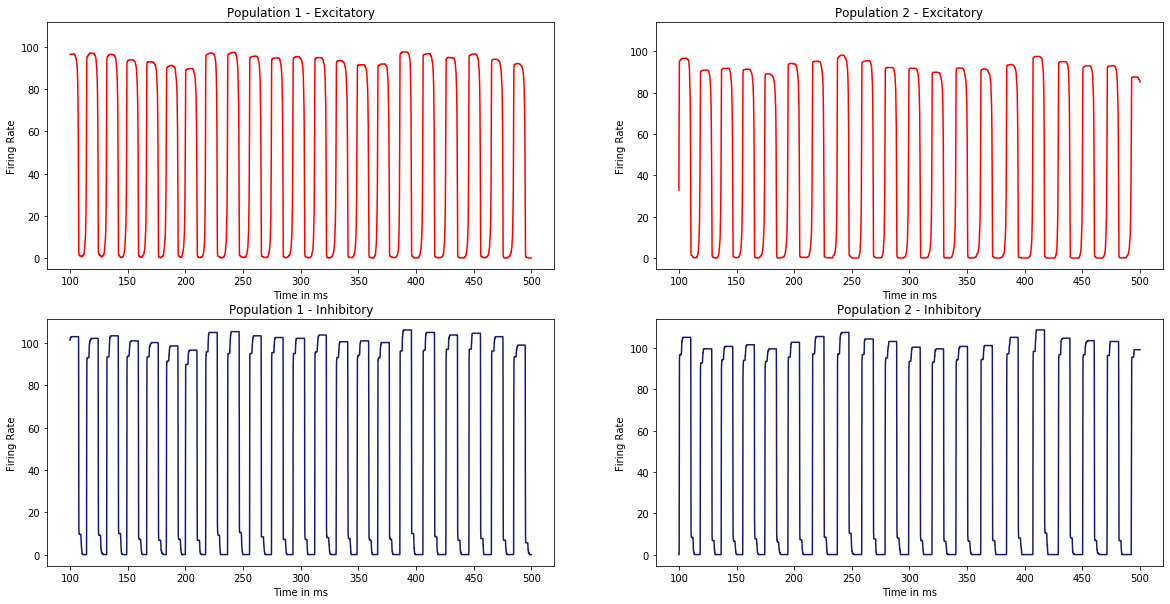

In [89]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

# Explorations

In [85]:
RUN = True

exp_params = {
  "poisson_variance": np.arange(1.0, 10.0, .5),
}

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=params,
    hdf_filename=constants.MODELS_PATH + "/uncorrelated_noise_sigma_test.h5",
    exploration_name="test4"
)

if RUN:
    ex.run()
    
ex.load_results(all=True)

2020-07-01 21:26:31,664	INFO resource_spec.py:212 -- Starting Ray with 11.33 GiB memory available for workers and up to 5.68 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-01 21:26:32,045	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/9 [00:00<?, ?it/s]

(pid=89112) Initializing net ...
(pid=89112) Net 1 - poisson rate 11250.0 - single neuron 14.0625
(pid=89112) Poisson strength: 0.02666666666666667
(pid=89114) Initializing net ...
(pid=89114) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=89114) Poisson strength: 0.01
(pid=89113) Initializing net ...
(pid=89113) Net 1 - poisson rate 12857.142857142857 - single neuron 16.07142857142857
(pid=89113) Poisson strength: 0.023333333333333334
(pid=89105) Initializing net ...
(pid=89105) Net 1 - poisson rate 18000.0 - single neuron 22.5
(pid=89105) Poisson strength: 0.016666666666666666
(pid=89108) Initializing net ...
(pid=89108) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=89108) Poisson strength: 0.013333333333333334
(pid=89111) Initializing net ...
(pid=89107) Initializing net ...
(pid=89107) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=89107) Poisson strength: 0.006666666666666667
(pid=89111) Net 1 - poisson rate 10000.0 - single neuron 12.5
(pid=89111) Pois

100%|██████████| 9/9 [00:00<00:00, 10.83it/s]


In [99]:
ex.df

,poisson_variance,C_exc,C_inh1,EL_exc,EL_inh1,E_AMPA,E_GABA,Ew_exc,Ew_inh1,J_etoe,...,t_ref,t_ref_exc,t_ref_inh1,tau_AMPA,tau_GABA,taum_exc,taum_inh1,tauw_exc,tauw_inh1,wm_init
0,1,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
1,2,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
2,3,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
3,4,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
4,5,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
5,6,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
6,7,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
7,8,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0
8,9,200.0,200.0,-65.0,-65.0,0.0,-70.0,-80.0,-80.0,0.4,...,0.0,1.0,1.0,3.0,6.0,20.0,20.0,200.0,200.0,0.0


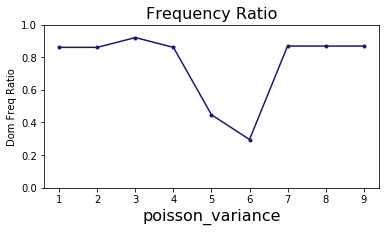

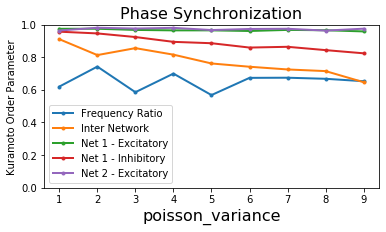

In [203]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None , vmax_phase=None)

In [8]:
exp_params = {
  "poisson_variance": np.arange(1.0, 5.0, 1.0),
  "poisson_p": np.arange(0.6, 1.0, .1),
}

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=params,
    hdf_filename=constants.MODELS_PATH + "/uncorrelated_noise_sigma_test.h5",
    exploration_name="test2"
)

In [9]:
ex.run()

2020-07-01 21:02:23,312	INFO resource_spec.py:212 -- Starting Ray with 12.11 GiB memory available for workers and up to 6.07 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-01 21:02:23,693	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/16 [00:00<?, ?it/s]

(pid=86700) Initializing net ...
(pid=86700) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=86700) Poisson strength: 0.01
(pid=86697) Initializing net ...
(pid=86697) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=86697) Poisson strength: 0.0033333333333333335
(pid=86699) Initializing net ...
(pid=86699) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=86699) Poisson strength: 0.006666666666666667
(pid=86693) Initializing net ...
(pid=86693) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=86693) Poisson strength: 0.0033333333333333335
(pid=86692) Initializing net ...
(pid=86692) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=86692) Poisson strength: 0.01
(pid=86702) Initializing net ...
(pid=86702) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=86702) Poisson strength: 0.01
(pid=86698) Initializing net ...
(pid=86698) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=86698) Poisson strength: 0.0033333333333333335
(pid=86703) Initial

 12%|█▎        | 2/16 [00:45<07:28, 32.00s/it]

(pid=86699) Initialization time: 1.0529909133911133s
(pid=86699) ==== Running Network ... ====


 75%|███████▌  | 12/16 [00:46<00:15,  3.86s/it]

(pid=86699) Starting simulation at t=0. s for a duration of 0.4 s
(pid=86703) Starting simulation at t=0. s for a duration of 0.4 s
(pid=86708) Initializing net ...
(pid=86708) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=86708) Poisson strength: 0.013333333333333334
(pid=86710) Initializing net ...
(pid=86710) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=86710) Poisson strength: 0.013333333333333334
(pid=86708) Net 2 - rate for single neuron 22.499999999999996
(pid=86710) Net 2 - rate for single neuron 19.6875
(pid=86708) Initialization time: 0.9435110092163086s
(pid=86710) Initialization time: 0.9553608894348145s
(pid=86708) ==== Running Network ... ====
(pid=86710) ==== Running Network ... ====
(pid=86699) 0.4 s (100%) simulated in 6s
(pid=86699) ==== Network Run Finished ====
(pid=86699) runtime: 8.9
(pid=86703) 0.4 s (100%) simulated in 5s
(pid=86703) ==== Network Run Finished ====
(pid=86703) runtime: 12.1


 81%|████████▏ | 13/16 [00:57<00:17,  5.95s/it]

(pid=86708) Starting simulation at t=0. s for a duration of 0.4 s
(pid=86710) Starting simulation at t=0. s for a duration of 0.4 s
(pid=86708) 0.4 s (100%) simulated in 5s
(pid=86708) ==== Network Run Finished ====
(pid=86708) runtime: 22.3
(pid=86708) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=86710) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=86710) 0.4 s (100%) simulated in 5s
(pid=86710) ==== Network Run Finished ====
(pid=86710) runtime: 24.4


100%|██████████| 16/16 [01:17<00:00,  4.83s/it]


In [68]:
ex.load_results(all=True)

100%|██████████| 50/50 [00:04<00:00, 10.85it/s]


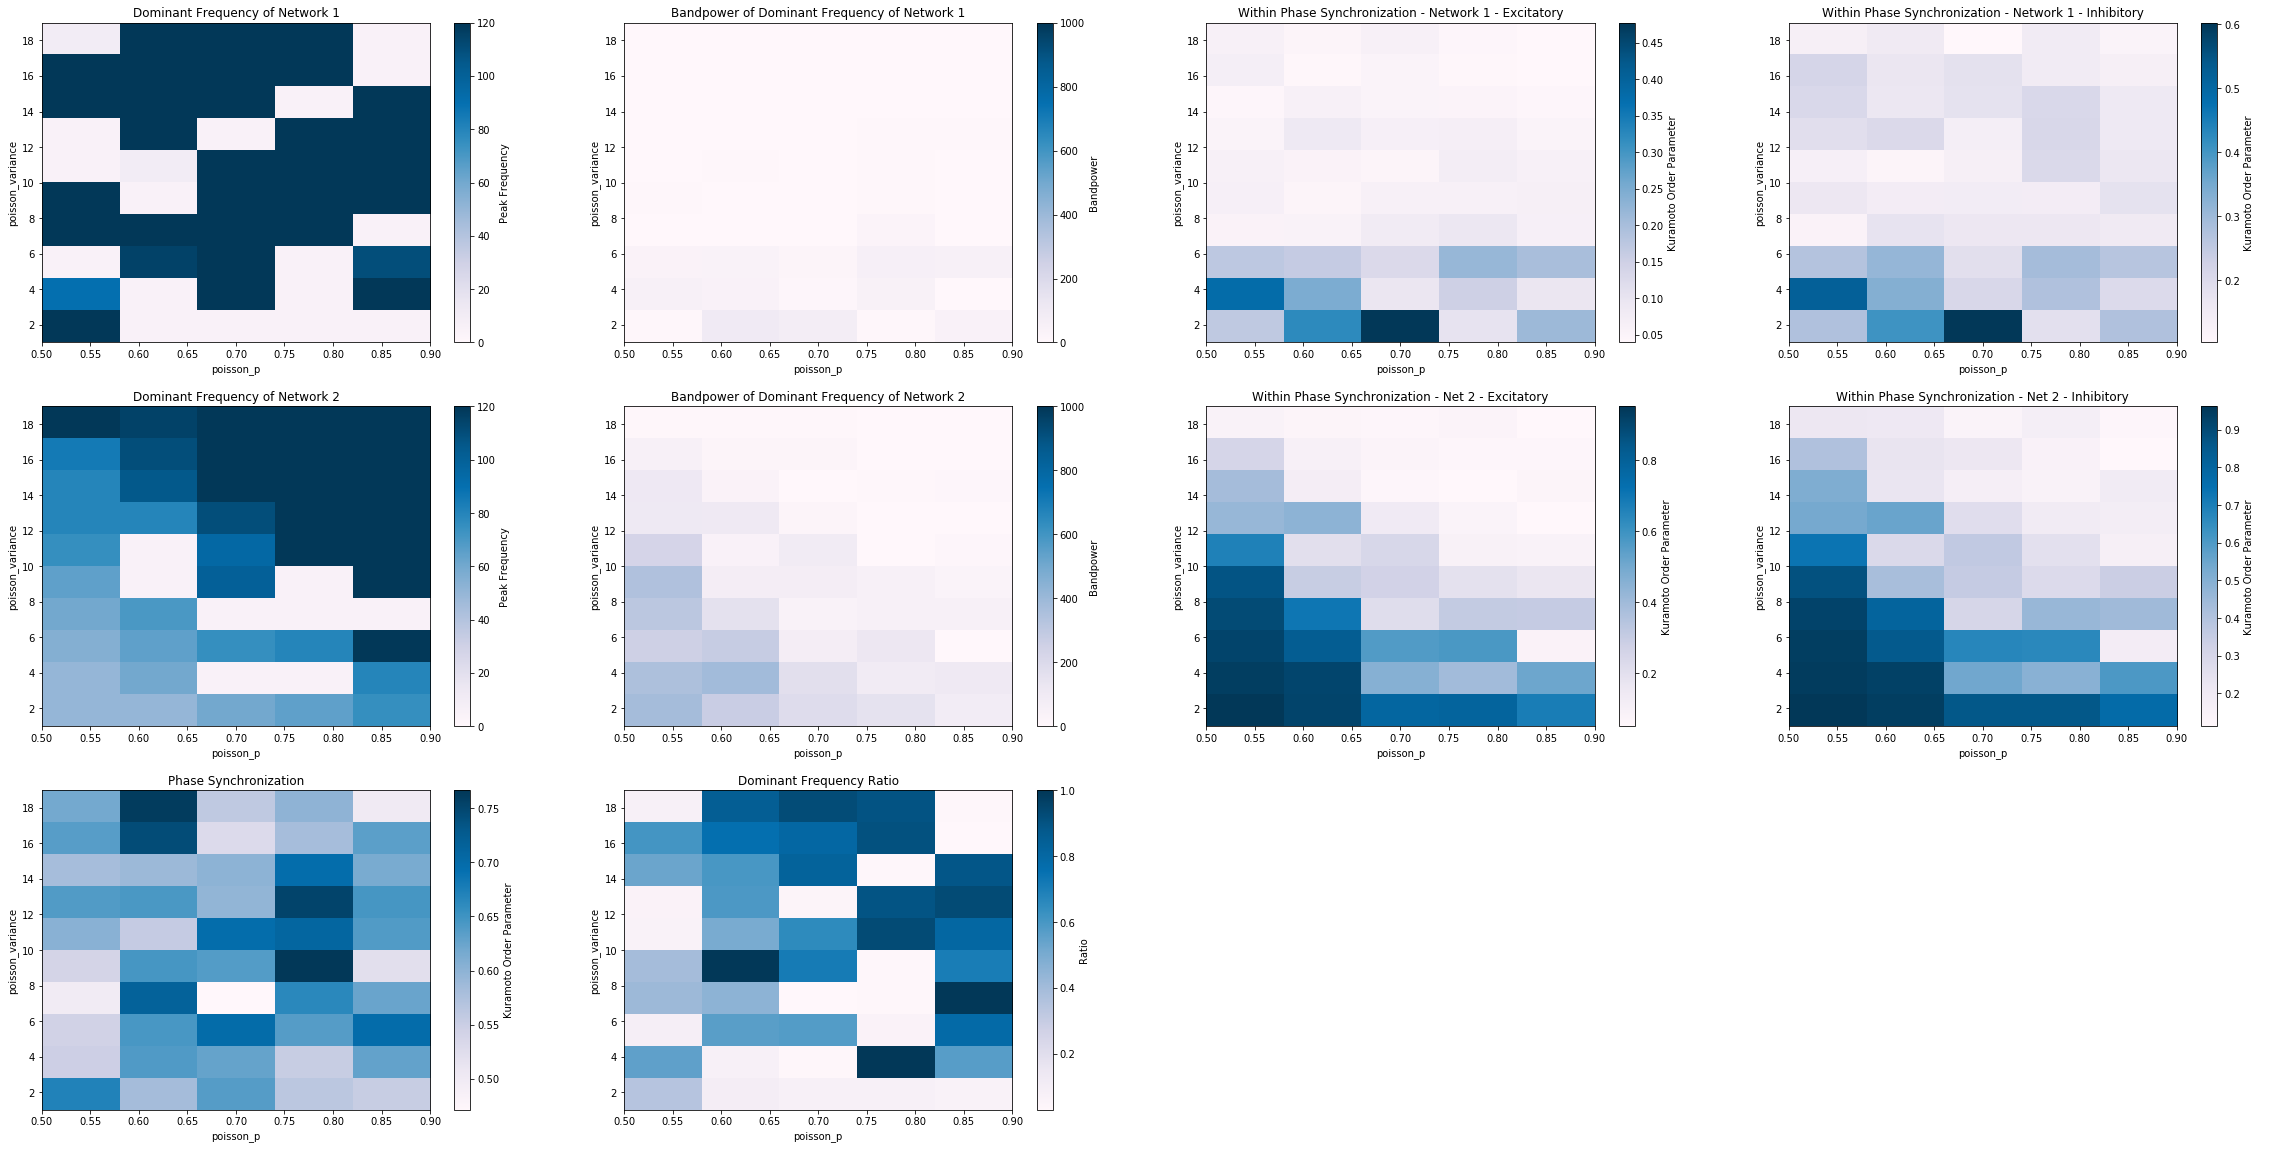

In [69]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None , vmax_phase=None)